In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
# Load the inference pickle file
with open('/storage/vbutoi/scratch/ESE/records/inference_stats.pkl', 'rb') as f:
    all_logs = pickle.load(f)

## Look at the particular comparison we want to make.

In [3]:
# Isolate the cases which have no-label and cases where there is at least some label.
def has_label(value):
    return (value != 0.0)

def weighted_metric(metric, weighting):
    return f"{metric}_{weighting}"

def reorder_splits(df):
    train_logs = df[df['split'] == 'train']
    val_logs = df[df['split'] == 'val']
    cal_logs = df[df['split'] == 'cal']
    fixed_df = pd.concat([train_logs, val_logs, cal_logs])
    return fixed_df

# Add some new useful columns
all_logs['has_label'] = all_logs['label_amount'].apply(has_label) 
all_logs['weighted_metric'] = all_logs.apply(lambda row: weighted_metric(row['metric'], row['metric_weighting']), axis=1)

# Drop some columns we won't use like metric_bins, and bin_counts
all_logs = all_logs.drop(columns=['metric_bins', 'bin_counts'])

# Some settings for the plots
logs = all_logs[all_logs['has_label'] == True]
logs = logs[logs['metric_weighting'] == 'weighted']
logs = logs[logs['metric'] != 'ESE']

# Now we want to collapse the data by subject, so we can get the mean metric score for each subject.
logs_per_subject = logs.groupby(['subj_idx', 'metric', 'metric_weighting', 'weighted_metric', 'task', 'split']).agg({
    'label_amount': 'mean',
    'metric_score': 'mean',
    'accuracy': 'mean',
    'dice': 'mean',
    'weighted_accuracy': 'mean'
}).reset_index()
logs_per_subject = reorder_splits(logs_per_subject)

# Group the metrics by important factors
grouped_logs = logs.groupby(['task', 'split', 'weighted_metric'])
grouped_logs_per_subject = logs_per_subject.groupby(['task', 'split', 'weighted_metric'])

## Correlation Comparison: Dice Score

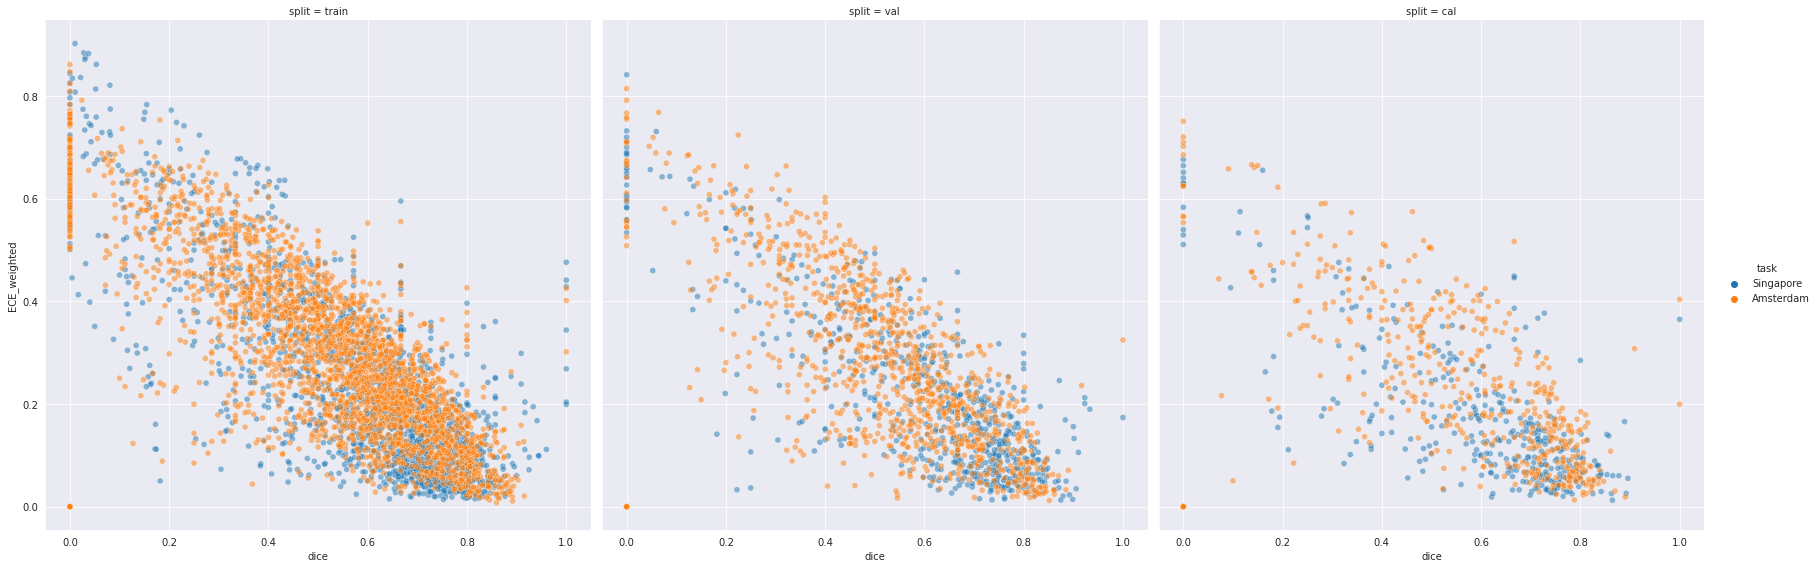

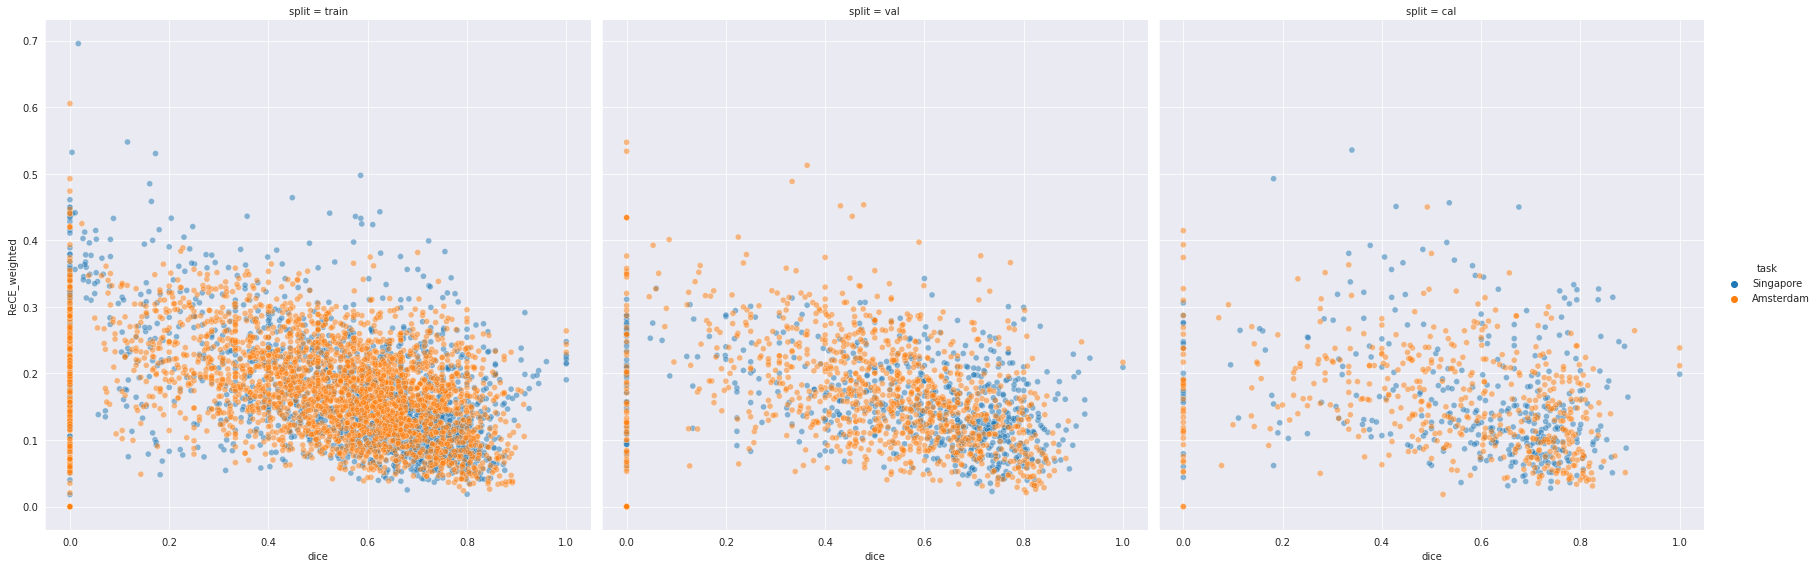

In [4]:
plt.rcParams.update({'font.size': 20})  

for metric in ["ECE_weighted", "ReCE_weighted"]:
    g = sns.relplot(
        data=logs[logs['weighted_metric'] == metric],
        x='dice',
        y='metric_score',
        col='split',
        hue='task',
        kind='scatter',
        height=8,
        facet_kws={"sharex": False},
        alpha=0.5,
        aspect=1
        )
    g.axes.flat[0].set_ylabel(metric)
    plt.show()

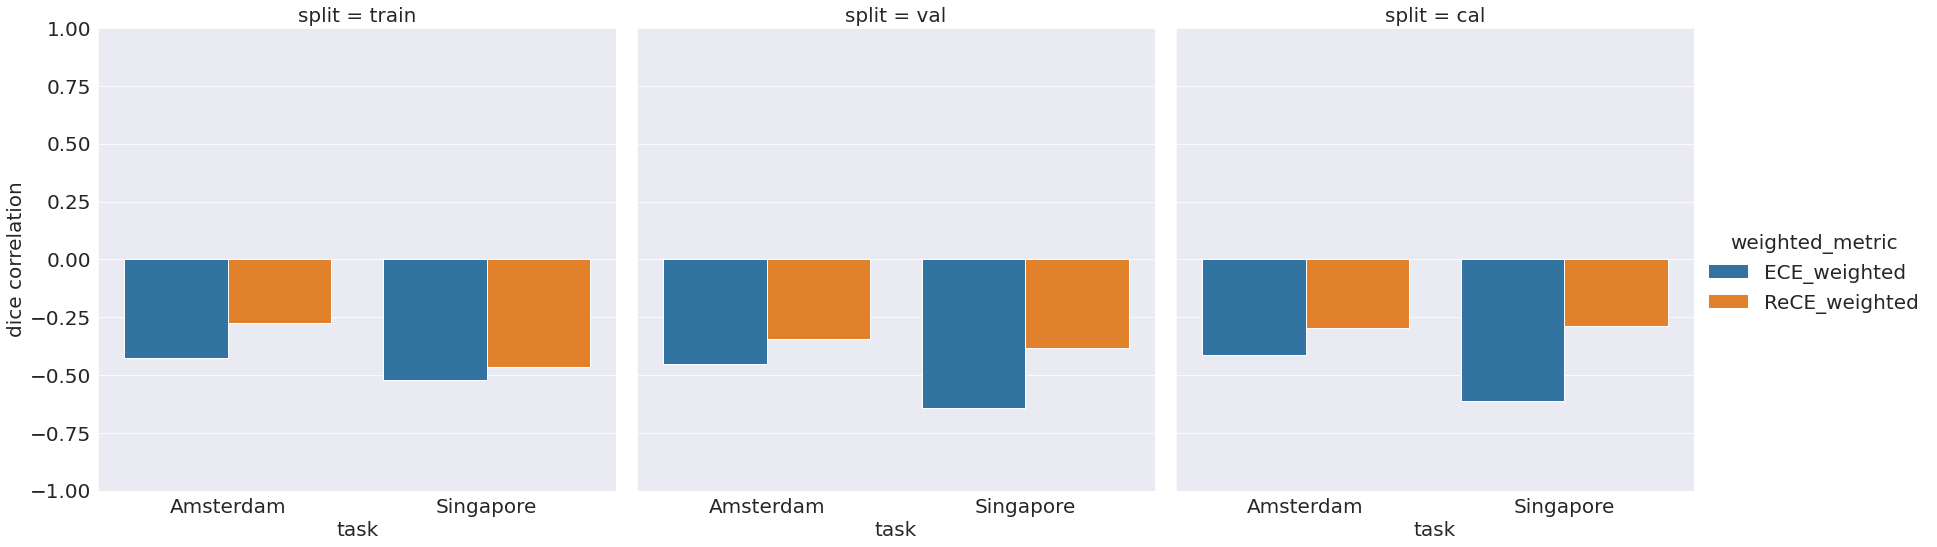

In [5]:
plt.rcParams.update({'font.size': 20})  

dice_correlations = grouped_logs.apply(lambda x: x['dice'].corr(x['metric_score'])).reset_index(name='dice correlation')
dice_correlations = reorder_splits(dice_correlations)
g = sns.catplot(data=dice_correlations, 
            x="task", 
            y="dice correlation", 
            hue='weighted_metric', 
            col="split", 
            kind="bar", 
            height=8, 
            aspect=1)
# Set the y lim between - 1 and 1
g.set(ylim=(-1, 1))

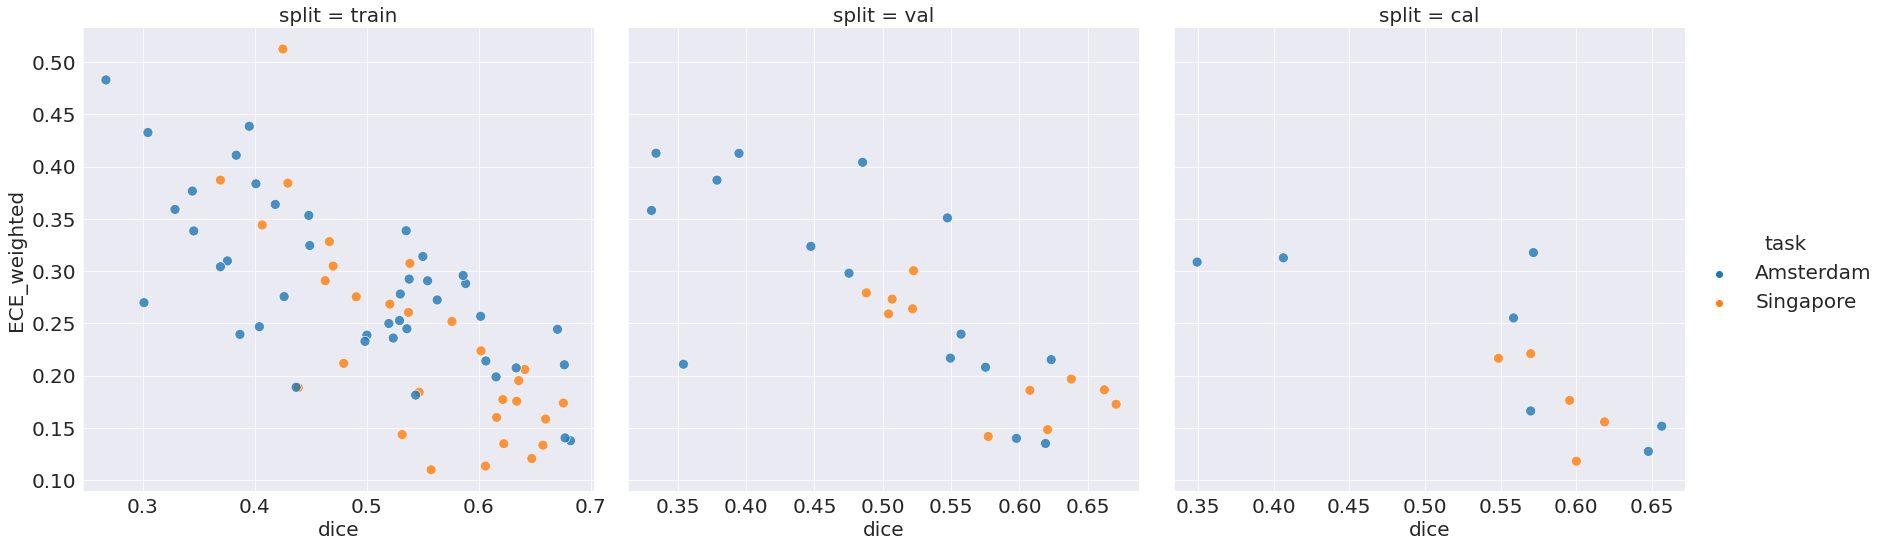

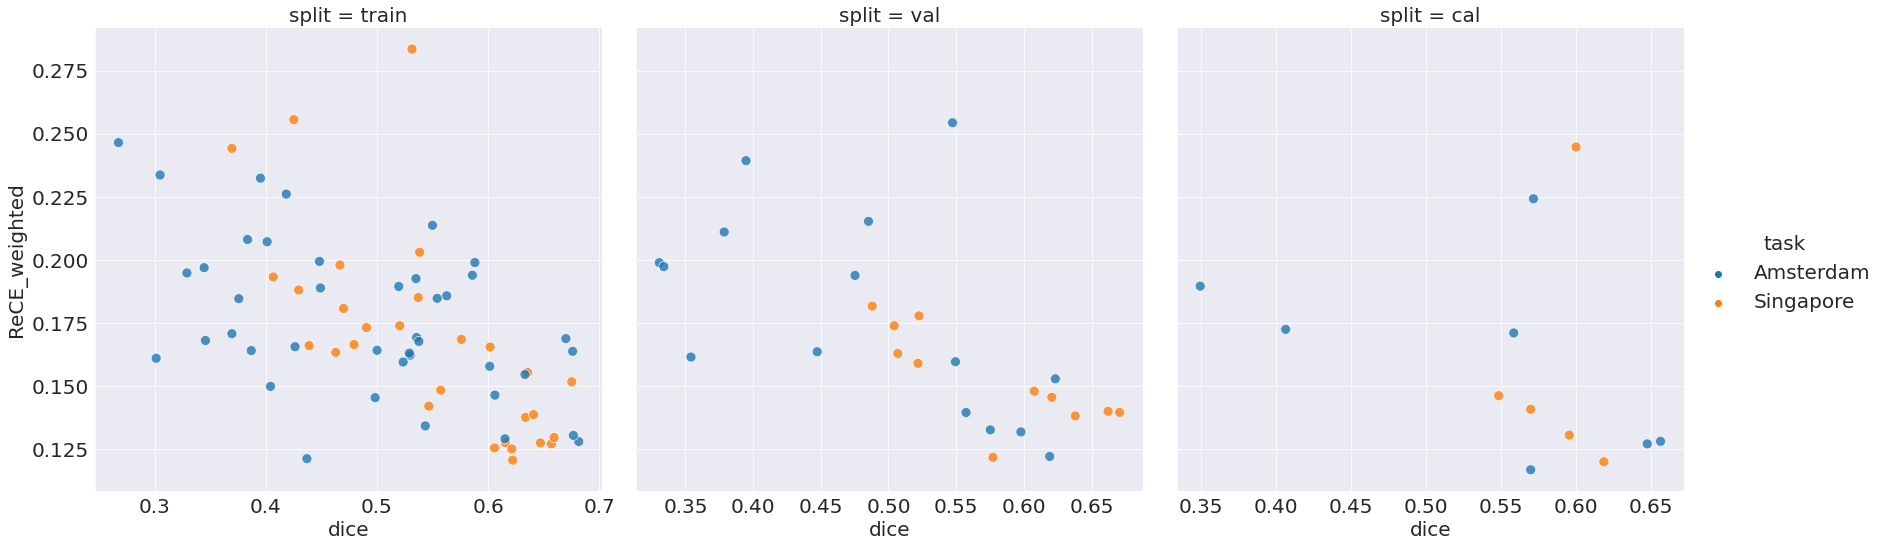

In [6]:
plt.rcParams.update({'font.size': 20})  

for metric in ["ECE_weighted", "ReCE_weighted"]:
    g = sns.relplot(
        data=logs_per_subject[logs_per_subject['weighted_metric'] == metric],
        x='dice',
        y='metric_score',
        col='split',
        hue='task',
        kind='scatter',
        s=100,
        height=8,
        facet_kws={"sharex": False},
        alpha=0.8,
        aspect=1
        )
    g.axes.flat[0].set_ylabel(metric)
    plt.show()

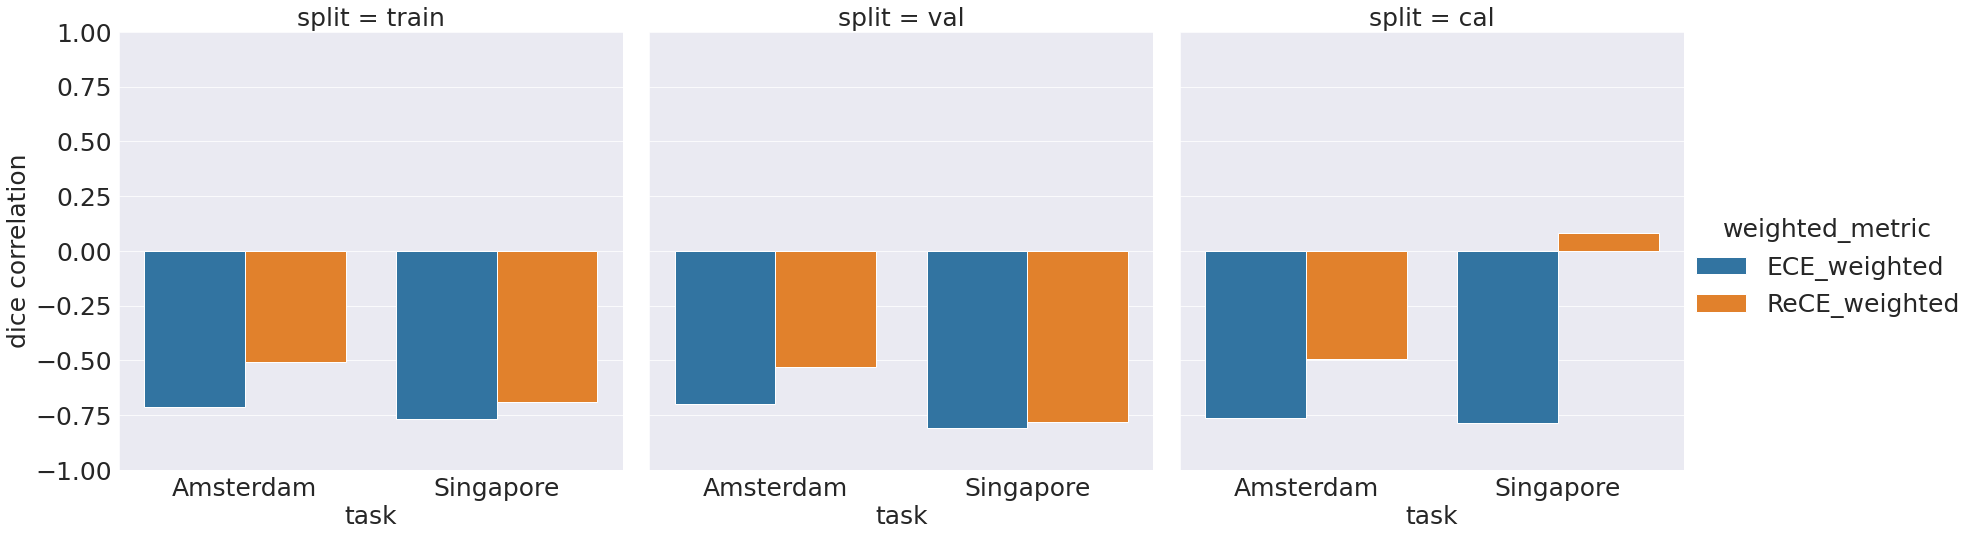

In [7]:

plt.rcParams.update({'font.size': 25})  

# Group by the three columns and apply correlation
dice_subject_correlations = grouped_logs_per_subject.apply(lambda x: x['dice'].corr(x['metric_score'])).reset_index(name='dice correlation')
dice_subject_correlations = reorder_splits(dice_subject_correlations)
g = sns.catplot(data=dice_subject_correlations, 
                x="task", 
                y="dice correlation", 
                hue='weighted_metric', 
                col="split", 
                kind="bar", 
                height=8, 
                aspect=1)
# Set the y lim between - 1 and 1
g.set(ylim=(-1, 1))

## Correlation Comparison: Groundtruth Label Amount

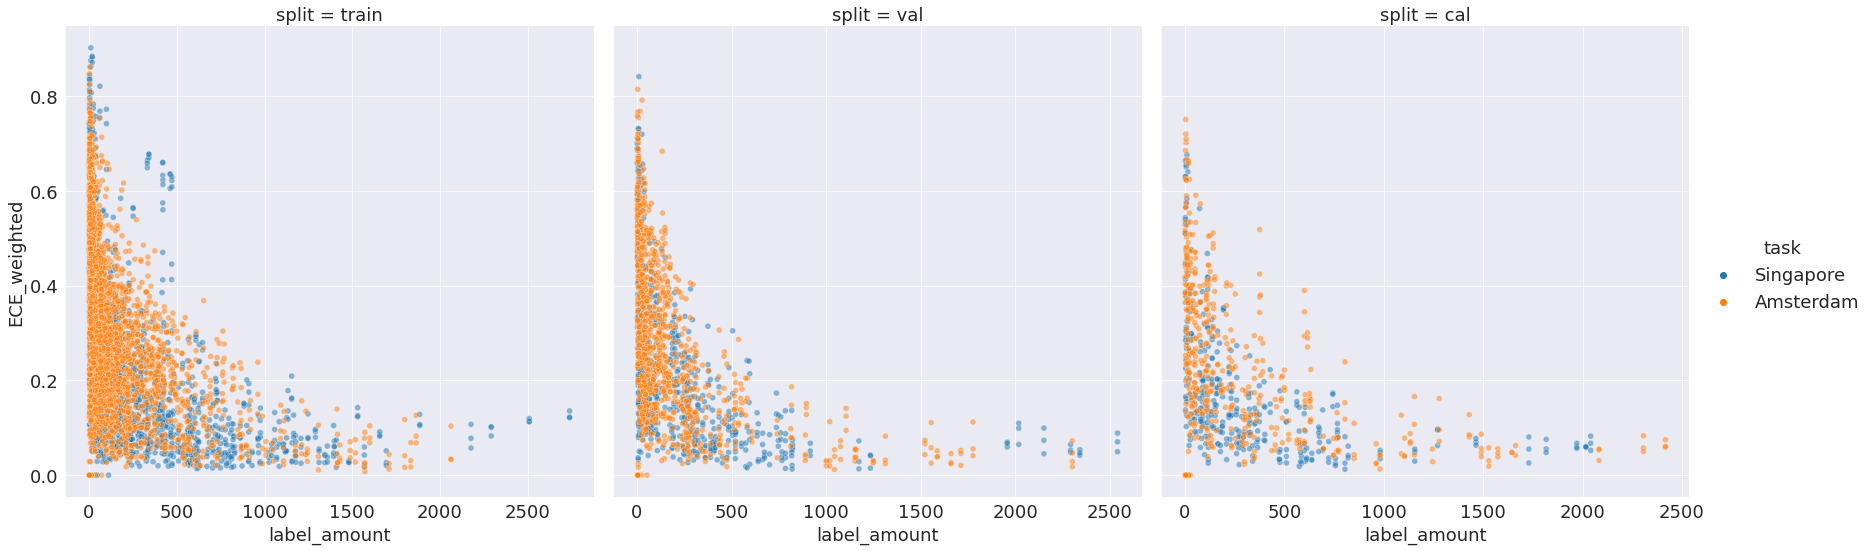

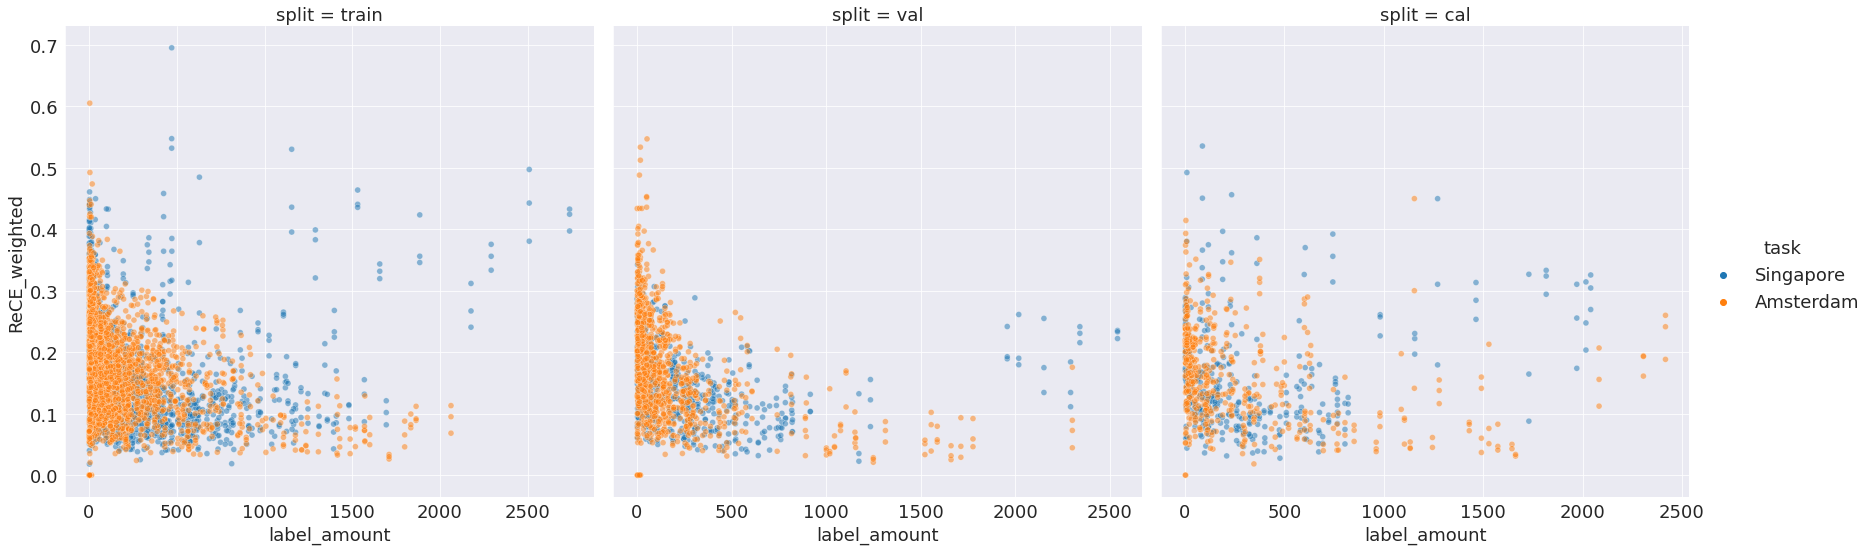

In [8]:
plt.rcParams.update({'font.size': 18})  

for metric in ["ECE_weighted", "ReCE_weighted"]:
    g = sns.relplot(
        data=logs[logs['weighted_metric'] == metric],
        x='label_amount',
        y='metric_score',
        col='split',
        hue='task',
        kind='scatter',
        height=8,
        facet_kws={"sharex": False},
        alpha=0.5,
        aspect=1)
    g.axes.flat[0].set_ylabel(metric)
    plt.show()

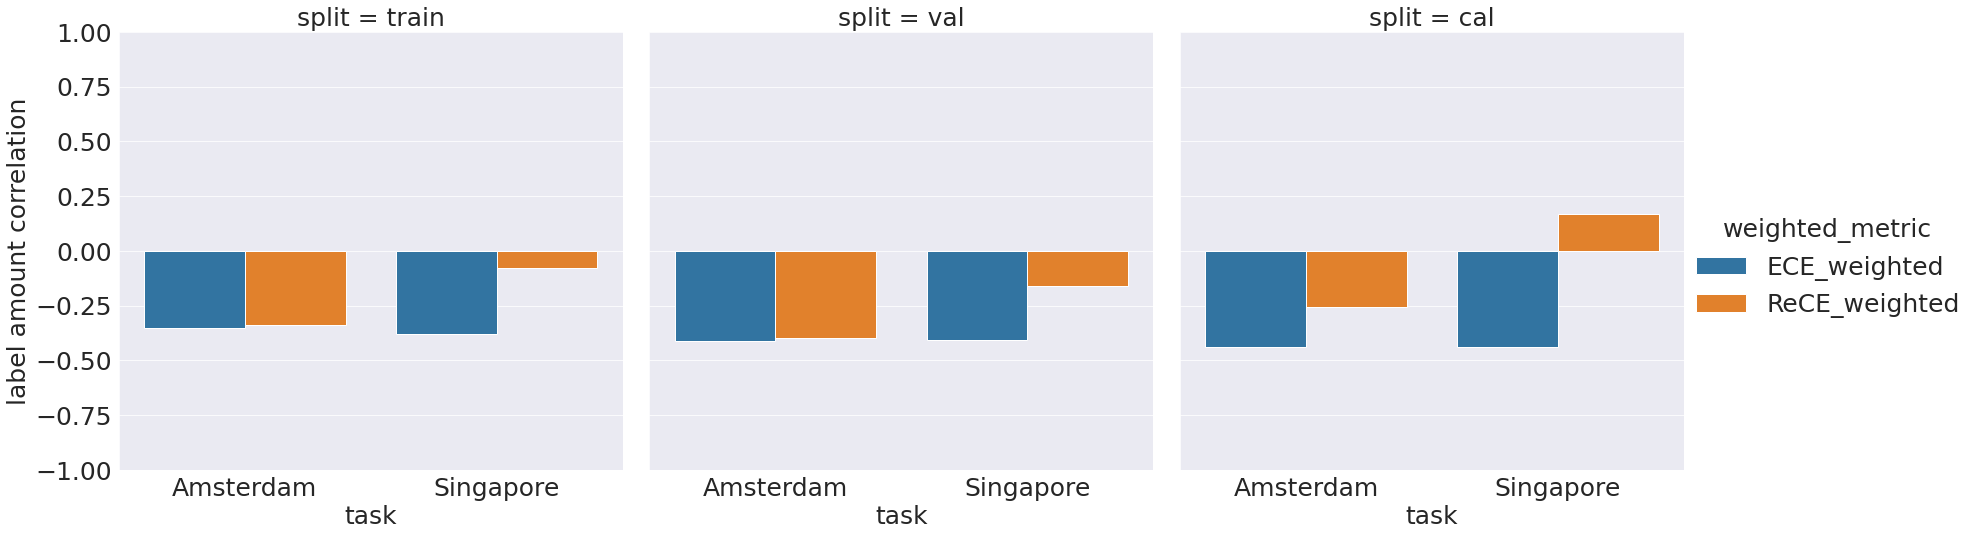

In [9]:
plt.rcParams.update({'font.size': 25})  

# Group by the three columns and apply correlation
label_amount_correlations = grouped_logs.apply(lambda x: x['label_amount'].corr(x['metric_score'])).reset_index(name='label amount correlation')
label_amount_correlations = reorder_splits(label_amount_correlations)
g = sns.catplot(data=label_amount_correlations, 
                x="task", 
                y="label amount correlation", 
                hue='weighted_metric', 
                col="split", 
                kind="bar", 
                height=8, 
                aspect=1)
# Set the y lim between - 1 and 1
g.set(ylim=(-1, 1))

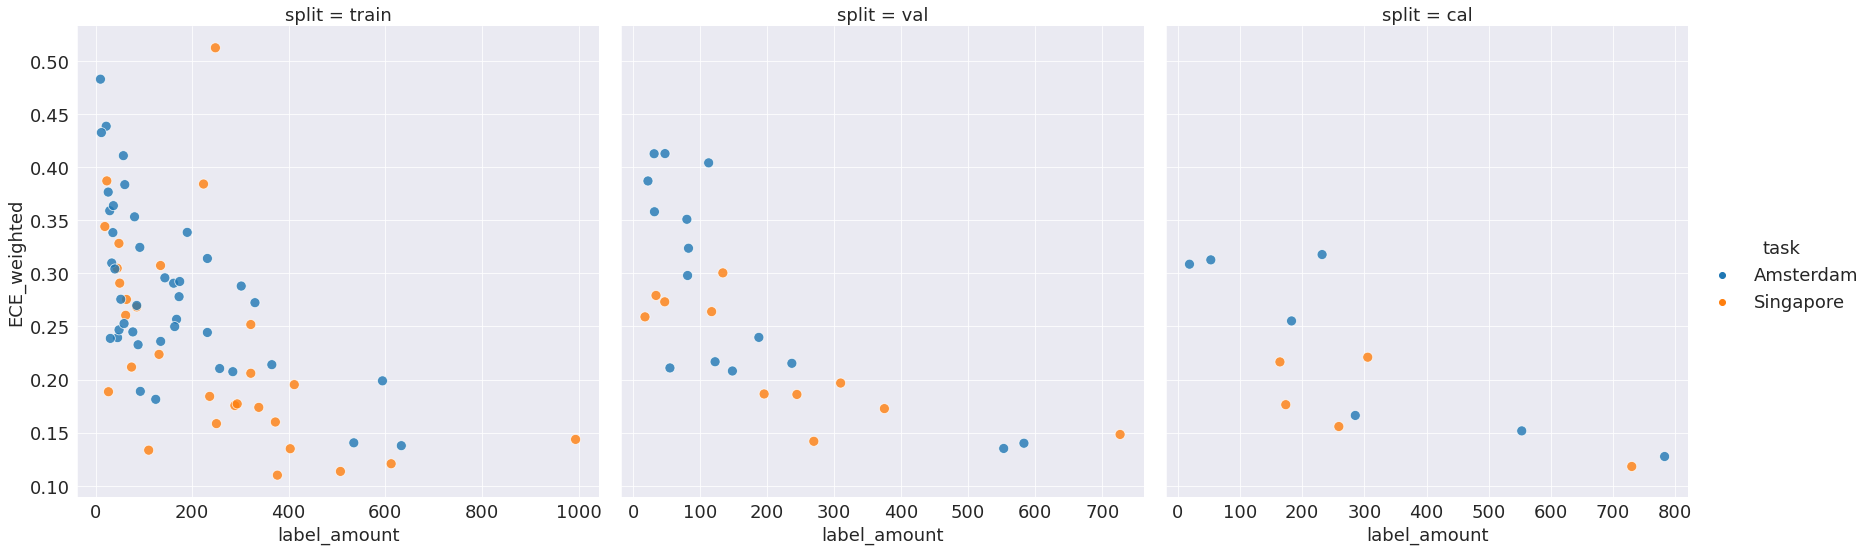

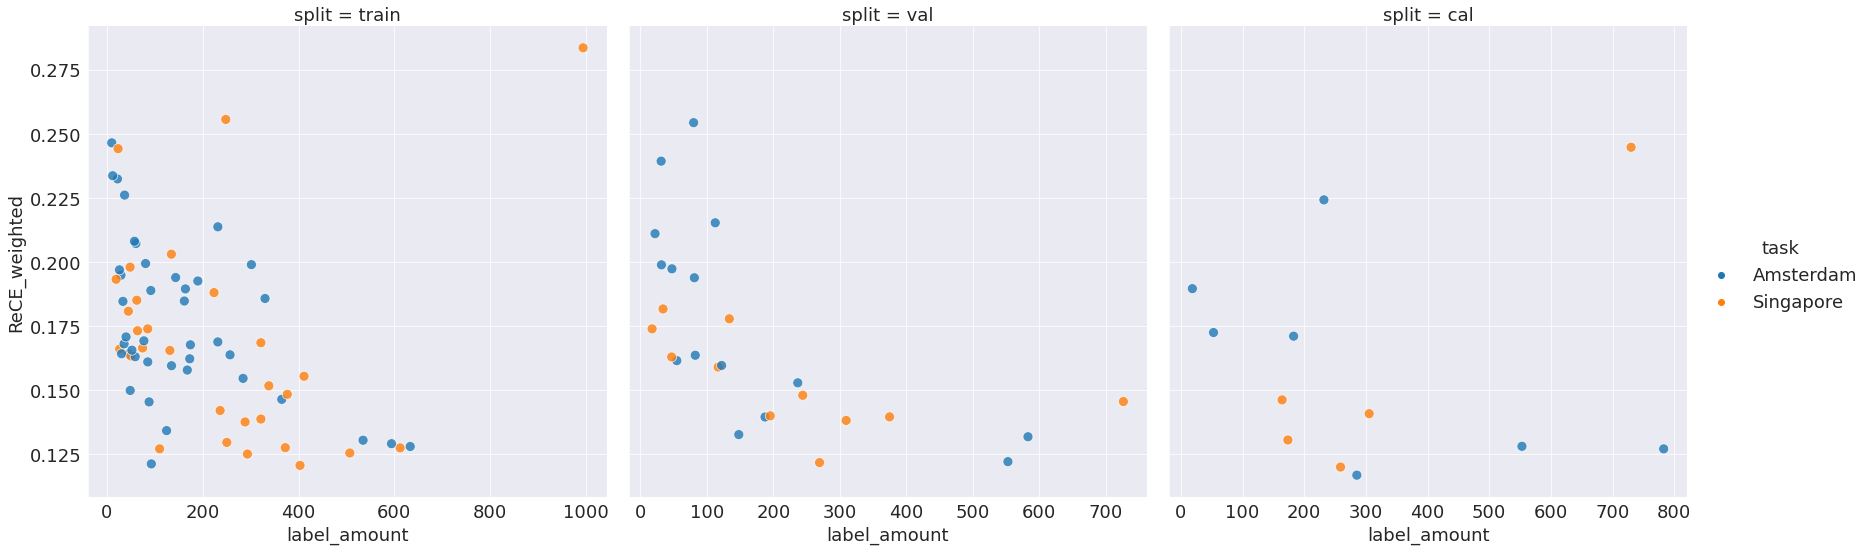

In [10]:
plt.rcParams.update({'font.size': 18})  

for metric in ["ECE_weighted", "ReCE_weighted"]:
    g = sns.relplot(
        data=logs_per_subject[logs_per_subject['weighted_metric'] == metric],
        x='label_amount',
        y='metric_score',
        col='split',
        hue='task',
        kind='scatter',
        s=100,
        height=8,
        facet_kws={"sharex": False},
        alpha=0.8,
        aspect=1)
    g.axes.flat[0].set_ylabel(metric)
    plt.show()

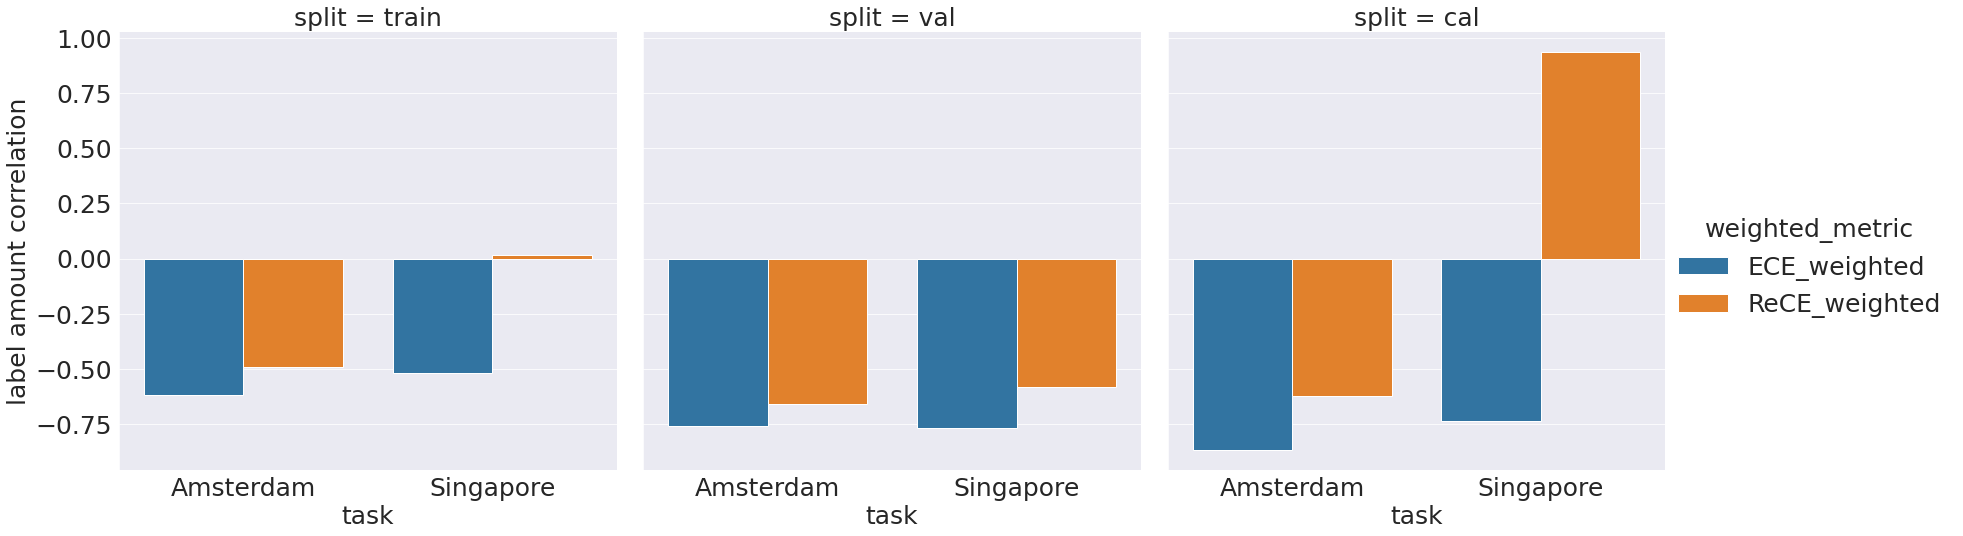

In [11]:

plt.rcParams.update({'font.size': 25})  

# Group by the three columns and apply correlation
label_amount_subject_correlations = grouped_logs_per_subject.apply(lambda x: x['label_amount'].corr(x['metric_score'])).reset_index(name='label amount correlation')
label_amount_subject_correlations = reorder_splits(label_amount_subject_correlations)
sns.catplot(data=label_amount_subject_correlations, 
            x="task", 
            y="label amount correlation", 
            hue='weighted_metric', 
            col="split", 
            kind="bar", 
            height=8, 
            aspect=1)
# Set the y lim between - 1 and 1
g.set(ylim=(-1, 1))